In [2]:
## Importing required packages
import pandas as pd 
import numpy as np 
import missingno as miss
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *

# For pre-processing data 
from sklearn import preprocessing as pp 
from sklearn.compose import ColumnTransformer 

# For splits and CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Cross validation 
from sklearn.model_selection import cross_validate # Cross validation 
from sklearn.model_selection import GridSearchCV # Cross validation + param. tuning.

# Machine learning methods 
from sklearn.linear_model import LinearRegression as LM
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.tree import DecisionTreeRegressor as DT_reg
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.ensemble import BaggingRegressor as Bag
from sklearn import tree # For plotting the decision tree rules

# For evaluating our model's performance
import sklearn.metrics as m


# For evaluating our model's performance
import sklearn.metrics as m

# Pipeline to combine modeling elements
from sklearn.pipeline import Pipeline

# Misc
import warnings
warnings.filterwarnings("ignore")

In [4]:
SP2 = pd.read_csv("C:/Users/VIOLIN/Desktop/Final-Project_Harshini-/Project Part -1/Processed data - part 1/SP2-output.csv")
IV_data = pd.read_csv("C:/Users/VIOLIN/Desktop/Final-Project_Harshini-/Project Part -2/Processed data part2/IV_data.csv")

In [5]:
SP2.head()

,country,illiterate_people_in_2018
0,Afghanistan,2791022.0
1,Aland Islands,NaN
2,Albania,3076.0
3,Algeria,156217.0
4,American Samoa,NaN


In [6]:
SP2.shape

(280, 2)

In [7]:
IV_data.head()

,country,city_ascii,population,2019 GDP per capita,1960 urban population%,2019 urban population%,2014 usable water per capita,2019 FDI data
0,Afghanistan,39,7474525.0,502.115487,8.401,25.754,1412.912141,2.340455e+07
1,Albania,50,1691769.0,5352.857411,30.705,61.229,9310.845162,1.201022e+09
2,Algeria,56,10827998.0,3948.343279,30.510,73.189,289.027090,1.381890e+09
3,American Samoa,1,12576.0,NaN,66.211,87.147,NaN,NaN
4,Andorra,1,22151.0,40886.391160,58.450,87.984,3984.194514,NaN


In [8]:
IV_data.shape

(177, 8)

In [9]:
SP2_model_data = pd.merge(SP2,IV_data,on = "country", how = "inner")

In [11]:
SP2_model_data.head()

,country,illiterate_people_in_2018,city_ascii,population,2019 GDP per capita,1960 urban population%,2019 urban population%,2014 usable water per capita,2019 FDI data
0,Afghanistan,2791022.0,39,7474525.0,502.115487,8.401,25.754,1412.912141,2.340455e+07
1,Albania,3076.0,50,1691769.0,5352.857411,30.705,61.229,9310.845162,1.201022e+09
2,Algeria,156217.0,56,10827998.0,3948.343279,30.510,73.189,289.027090,1.381890e+09
3,American Samoa,NaN,1,12576.0,NaN,66.211,87.147,NaN,NaN
4,Andorra,NaN,1,22151.0,40886.391160,58.450,87.984,3984.194514,NaN


In [12]:
SP2_model_data.shape

(165, 9)

In [13]:
## Checking for missing values
# Checking any Missing Values
SP2_model_data.isnull().any()

country                         False
illiterate_people_in_2018        True
city_ascii                      False
population                      False
2019 GDP per capita              True
1960 urban population%           True
2019 urban population%           True
2014 usable water per capita     True
2019 FDI data                    True
dtype: bool

In [14]:
 #checking how much invalid data exists
    # to determine if data is valid
SP2_model_data.isnull().sum()

country                          0
illiterate_people_in_2018       97
city_ascii                       0
population                       0
2019 GDP per capita             21
1960 urban population%           1
2019 urban population%           1
2014 usable water per capita    21
2019 FDI data                   12
dtype: int64

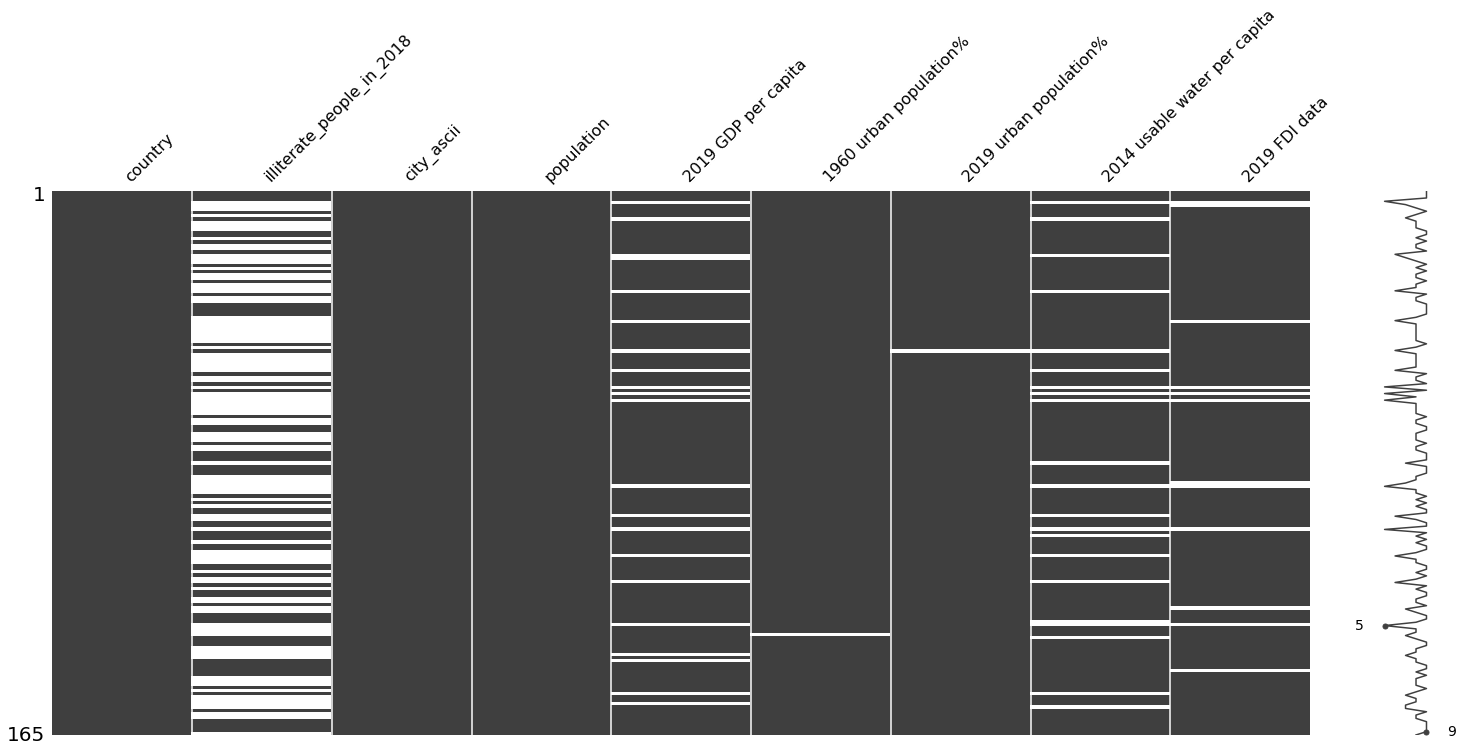

In [15]:
#Visually Checked to see the missing values
miss.matrix(SP2_model_data)

In [16]:
## Let us work on the missing values
SP2_model = SP2_model_data.dropna(axis='rows')
print(SP2_model)


                      country  illiterate_people_in_2018  city_ascii  \
0                 Afghanistan                  2791022.0          39   
1                     Albania                     3076.0          50   
2                     Algeria                   156217.0          56   
6                   Argentina                    35374.0         236   
12                    Bahrain                      599.0           4   
13                 Bangladesh                  2052958.0          18   
15                    Belarus                     1395.0          89   
18                      Benin                   890035.0          10   
22                     Brazil                   269941.0         784   
24               Burkina Faso                  1651809.0          31   
27                   Cameroon                   745178.0          34   
31   Central African Republic                   623445.0          24   
34                      China                   375315.0        

In [17]:
SP2_model.dtypes

country                          object
illiterate_people_in_2018       float64
city_ascii                        int64
population                      float64
2019 GDP per capita             float64
1960 urban population%          float64
2019 urban population%          float64
2014 usable water per capita    float64
2019 FDI data                   float64
dtype: object

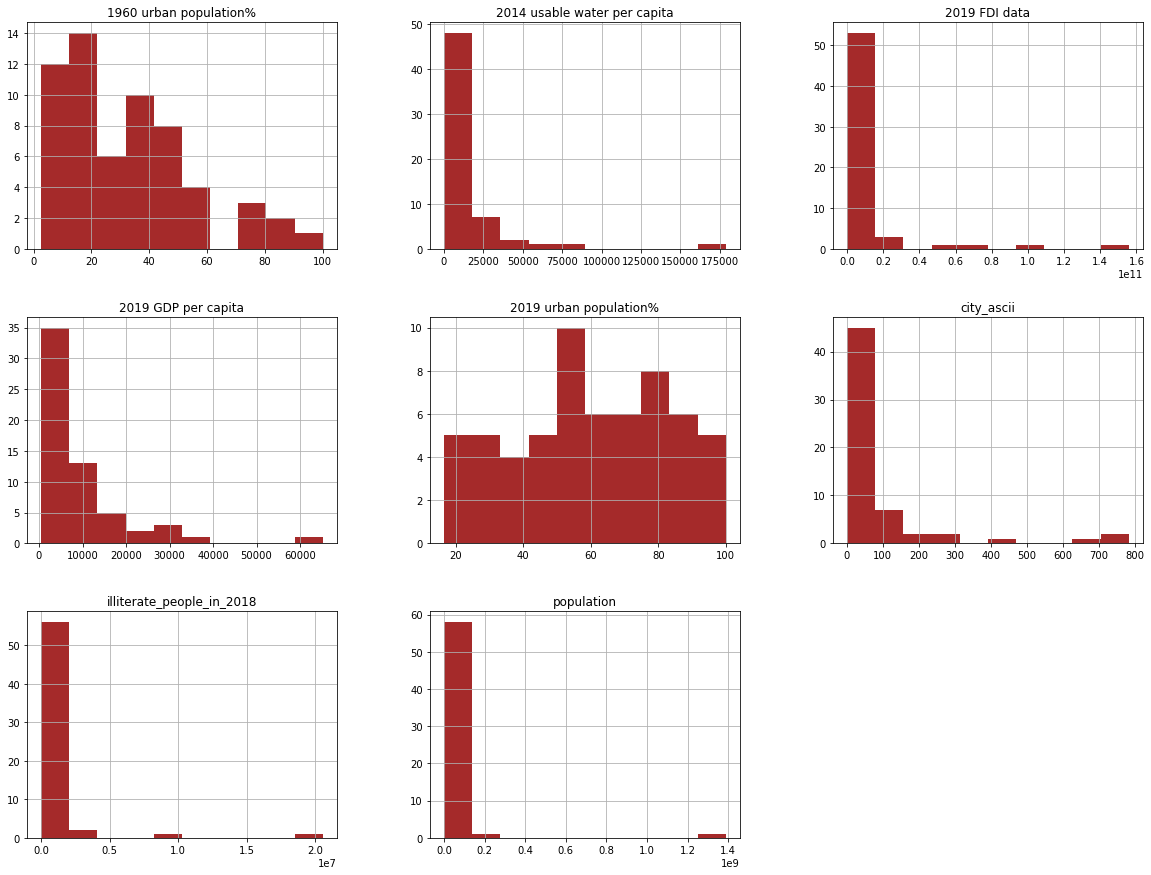

In [21]:
num_bins = 10

SP2_model.hist(bins = num_bins, figsize=(20,15),color = 'brown')
plt.savefig("HistogramPlots")
plt.show()

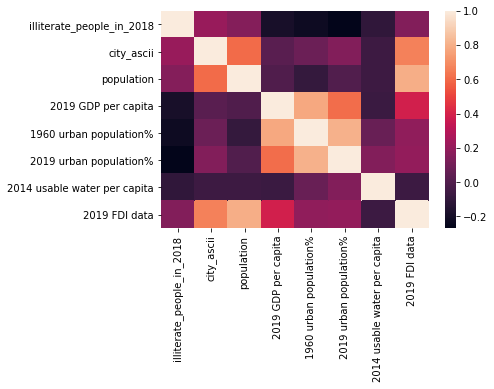

In [22]:
# Correlation between all the Parameters  
# if it is positive, the two variables tend to be high or low together
# If it is negative, the two variables tend to be opposite of each other
corr = SP2_model.corr()
# Correlation Plot
sns.heatmap(corr)

## Our Target variable is illiterate people in 2018. Let us see the Independent variables that has the the highest correlation with this !

In [24]:
# Correlation Values of all the Features with respect to Target Variable 
## Top Values
print (corr['illiterate_people_in_2018'].sort_values(ascending=False)[:10], '\n')

illiterate_people_in_2018       1.000000
city_ascii                      0.213374
population                      0.152845
2019 FDI data                   0.149384
2014 usable water per capita   -0.108398
2019 GDP per capita            -0.184511
1960 urban population%         -0.222852
2019 urban population%         -0.268748
Name: illiterate_people_in_2018, dtype: float64 



## Splitting data

In [30]:
y = SP2_model[['illiterate_people_in_2018']]
X = SP2_model.drop(columns=['illiterate_people_in_2018','country'])
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = .25,random_state=123)

In [27]:
print(train_X.shape[0]/SP2_model.shape[0])
print(test_X.shape[0]/SP2_model.shape[0])

0.75
0.25


In [28]:
# Let's scale the data 
scaler = pp.MinMaxScaler()
col_names = list(train_X)
train_X = scaler.fit_transform(train_X)

In [29]:
# Convert back into data frame
train_X = pd.DataFrame(train_X,columns=col_names)
train_X

,city_ascii,population,2019 GDP per capita,1960 urban population%,2019 urban population%,2014 usable water per capita,2019 FDI data
0,0.048531,0.005348,0.000000,0.059559,0.102084,0.007880,0.000411
1,0.021711,0.016735,0.020911,0.026027,0.242989,0.003781,0.013113
2,0.042146,0.005962,0.015384,0.116396,0.479580,0.067249,0.005276
3,0.031928,0.002920,0.000311,0.082567,0.248503,0.079822,0.001719
4,1.000000,0.097466,0.126911,0.447012,0.840652,0.156016,0.471875
5,0.879949,1.000000,0.150771,0.139661,0.519973,0.011507,1.000000
6,0.038314,0.002437,0.075894,0.338491,0.538972,0.099063,0.002775
7,0.067688,0.001985,0.242356,0.797136,0.944683,0.151517,0.006477
8,0.158365,0.016340,0.449730,0.554076,0.764957,0.013354,0.073610
9,0.551724,0.194498,0.024749,0.157331,0.207518,0.006221,0.324988


In [ ]:
## Cross validation